# Perspective Transformation & Affine Transformations with Translation, Rotation

<module 'matplotlib.pyplot' from 'C:\\Users\\DELL\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

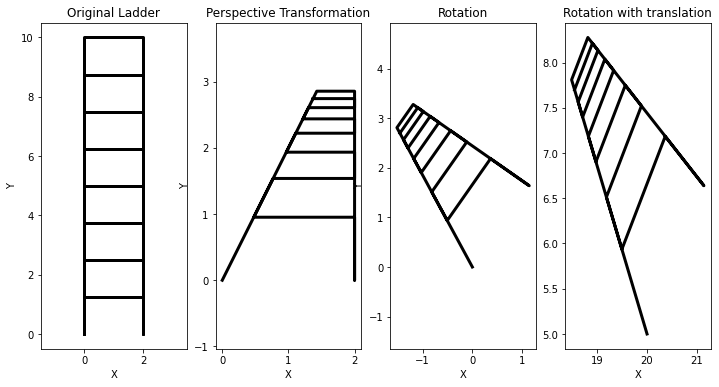

In [118]:
import numpy as np
import matplotlib.pyplot as plt

# Define the vertices of the ladder in homogeneous coordinates
ladder_height = 10  # Height of vertical lines
rung_width = 2 # Width of each rung
rung_height = ladder_height / 8  # Height of each rung, assuming equal spacing
ladder_vertices = np.array([[0, 0, 1], [0, ladder_height, 1], [rung_width, ladder_height, 1], [rung_width, 0, 1]])

# Add horizontal rungs to the ladder vertices
rung_spacing = rung_height  # Spacing between horizontal rungs
for i in range(1, 8):
    rung_y = i * rung_spacing
    rung_left = np.array([[0, rung_y, 1]])
    rung_right = np.array([[rung_width, rung_y, 1]])
    if i % 2 == 0:
        ladder_vertices = np.concatenate((ladder_vertices, rung_left, rung_right), axis=0)
    else:
        ladder_vertices = np.concatenate((ladder_vertices, rung_right, rung_left), axis=0)

# Define the projection matrix for perspective transformation
projection_matrix = np.array([[1, 0.5, 0], [0, 1, 0], [0, 0.25, 1]])

# Perform perspective transformation on ladder vertices
projected_ladder_vertices = np.dot(ladder_vertices, projection_matrix.T)
projected_ladder_vertices /= projected_ladder_vertices[:, 2].reshape(-1, 1)

# Perform rotation on the projected ladder
angle = np.deg2rad(55)  # Angle in radians
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle), 0], [np.sin(angle), np.cos(angle), 0], [0, 0, 1]])
rotated_ladder_vertices = np.dot(projected_ladder_vertices, rotation_matrix.T)

# Define the translation matrix
tx = 20  #mount of translation in x direction
ty = 5 # Amount of translation in y direction
translation_matrix = np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1]])

# Perform translation on the projected ladder
translated_ladder_vertices2 = np.dot(projected_ladder_vertices, translation_matrix.T)

# Perform translation on the rotated ladder
translated_ladder_vertices = np.dot(rotated_ladder_vertices, translation_matrix.T)



# Plot the original ladder
#ig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12,6))
plt.figure(figsize=(12,6))
plt.subplot(141)
plt.plot(ladder_vertices[:, 0], ladder_vertices[:, 1], '-k', linewidth=3)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Original Ladder')
plt.axis('equal')


# Plot the ladder with perspective transformation
plt.subplot(142)
plt.plot(projected_ladder_vertices[:, 0], projected_ladder_vertices[:, 1], '-k', linewidth=3)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Perspective Transformation')
plt.axis('equal')


# Plot the ladder with rotation
plt.subplot(143)
plt.plot(rotated_ladder_vertices[:, 0], rotated_ladder_vertices[:, 1], '-k', linewidth=3)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Rotation')
plt.axis('equal')


# Plot the rotation ladder with translation
plt.subplot(144)
plt.plot(translated_ladder_vertices[:, 0], translated_ladder_vertices[:, 1], '-k', linewidth=3)
plt.title('Rotation with translation')
plt.xlabel('X')
plt






<module 'matplotlib.pyplot' from 'C:\\Users\\DELL\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

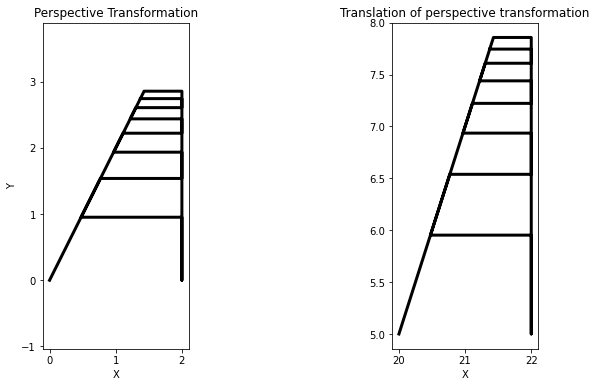

In [122]:
# Plot the ladder with perspective transformation
plt.figure(figsize=(12, 6))
plt.subplot(142)
plt.plot(projected_ladder_vertices[:, 0], projected_ladder_vertices[:, 1], '-k', linewidth=3)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Perspective Transformation')
plt.axis('equal') 
    
#Plot the projected ladder with translation
plt.subplot(144)
plt.plot(translated_ladder_vertices2[:, 0], translated_ladder_vertices2[:, 1], '-k', linewidth=3)
plt.xlabel('X')
plt.title('Translation of perspective transformation')
plt

In [80]:
reflection_matrix = np.array([[-1, 0, 0],
                              [0, 1, 0],
                              [0, 0, 1]])

In [109]:
reflected_ladder_vertices = np.dot(projected_ladder_vertices, reflection_matrix.T)
translated_reflected_ladder_vertices = np.dot(reflected_ladder_vertices, translation_matrix.T)

# Reflection of the Perspective Transformation

(17.9, 20.1, 4.857142857142857, 8.0)

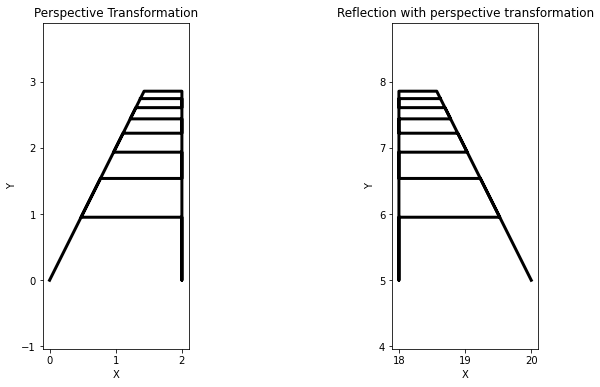

In [123]:
# Plot the ladder with perspective transformation
plt.figure(figsize=(12, 6))
plt.subplot(142)
plt.plot(projected_ladder_vertices[:, 0], projected_ladder_vertices[:, 1], '-k', linewidth=3)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Perspective Transformation')
plt.axis('equal')
# Plot the ladder with reflection and translation
plt.subplot(144)
plt.plot(translated_reflected_ladder_vertices[:, 0], translated_reflected_ladder_vertices[:, 1], '-k', linewidth=3)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Reflection with perspective transformation')
plt.axis('equal')

# Reflection of the Rotated Ladder

(18.719437508503734, 21.65444912197551, 4.836145304663809, 8.44094860206002)

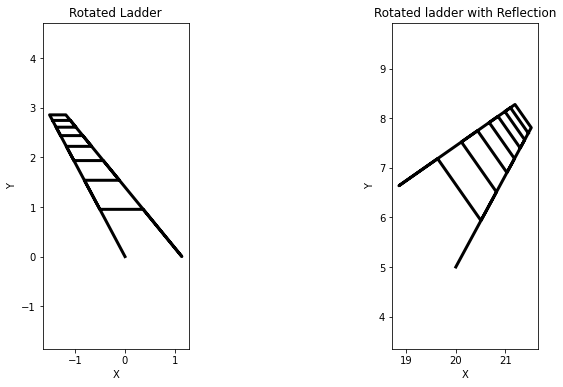

In [117]:
reflected_ladder_vertices2 = np.dot(rotated_ladder_vertices, reflection_matrix.T)
translated_reflected_ladder_vertices2 = np.dot(reflected_ladder_vertices2, translation_matrix.T)

# Plot the ladder with perspective transformation
plt.figure(figsize=(12, 6))
plt.subplot(142)
plt.plot(rotated_ladder_vertices[:, 0], projected_ladder_vertices[:, 1], '-k', linewidth=3)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Rotated Ladder')
plt.axis('equal')
# Plot the ladder with reflection and translation
plt.subplot(144)
plt.plot(translated_reflected_ladder_vertices2[:, 0], translated_reflected_ladder_vertices2[:, 1], '-k', linewidth=3)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Rotated ladder with Reflection')
plt.axis('equal')